# Setup

In [2]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt

In [3]:
def connection():
    print("Starting Connection")

    conn = mysql.connector.connect(
        host = "localhost",
        user = "root",
        password = "root",
        database = "seleksi",
        charset = "utf8mb4"
    )

    print("Connection Success")
    return conn

conn = connection()

Starting Connection
Connection Success


In [4]:
query = """ 
select distinct lecturerName, count(lecturerName) as count
from courselecturers
group by lecturerName
order by count(lecturerName) DESC;
"""
LecturerMostCourse = pd.read_sql(query, conn)

C:\Users\Matthew\AppData\Local\Temp\ipykernel_15244\214907179.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  LecturerMostCourse = pd.read_sql(query, conn)


In [5]:
LecturerMostCourse.loc[LecturerMostCourse['count'] >= 2]

,lecturerName,count
0,Prof. Erik Demaine,4
1,Prof. John Guttag,3
2,Prof. Charles Leiserson,3
3,Prof. Hari Balakrishnan,2
4,Prof. Lorlene Hoyt,2
5,Prof. Alan Edelman,2
6,Prof. Michael Ernst,2
7,Prof. Joseph Ferreira,2
8,Prof. Arvind,2
9,Prof. Leslie Kaelbling,2


In [6]:
query = """ 
select name as Course_Name, numberofcourses as Count
from Departments
order by numberofcourses DESC;
"""

NumberCourses = pd.read_sql(query, conn)

C:\Users\Matthew\AppData\Local\Temp\ipykernel_15244\1251067871.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  NumberCourses = pd.read_sql(query, conn)


In [7]:
NumberCourses.head()

,Course_Name,Count
0,Electrical Engineering and Computer Science,146
1,Mathematics,36
2,Supplemental Resources,17
3,Sloan School of Management,17
4,Aeronautics and Astronautics,16


In [8]:
query = """ 
select ftype as File_Type, count(ftype) as Count
from Resource
group by ftype
order by count(ftype) desc;
"""

fTypeCount = pd.read_sql(query, conn)

fTypeCount.head()

C:\Users\Matthew\AppData\Local\Temp\ipykernel_15244\3931177596.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  fTypeCount = pd.read_sql(query, conn)


,File_Type,Count
0,PDF File,1408
1,File,252
2,Video File,109
3,Image File,27


In [41]:
query = """ 
select distinct level, count(level) as Count
from CourseLevel
group by level
order by count(level) desc;
"""
levelCount = pd.read_sql(query, conn)
levelCount

C:\Users\Matthew\AppData\Local\Temp\ipykernel_15244\2943514259.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  levelCount = pd.read_sql(query, conn)


,level,Count
0,Graduate,52
1,Undergraduate,43
2,Non Credit,5


# Dashboard

## Lecturers with 2 Courses or More in Computer Science

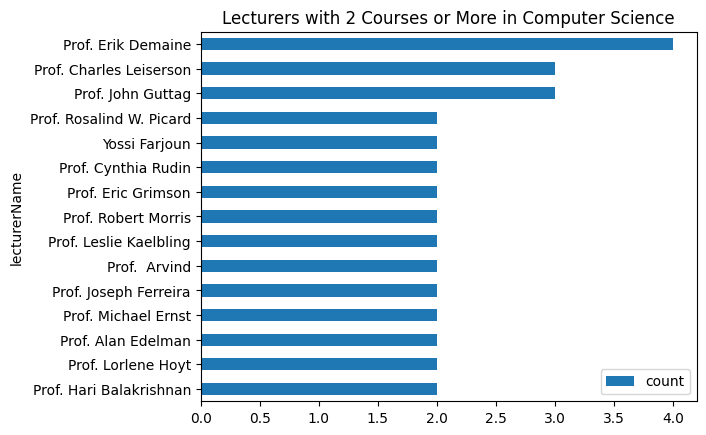

In [39]:
LecturerMostCourse.loc[LecturerMostCourse['count'] >= 2].sort_values('count', ascending=True).plot(kind = "barh",
                                                                                                    y='count',
                                                                                                    x='lecturerName')
plt.title('Lecturers with 2 Courses or More in Computer Science')
plt.show()

## Number of Computer Science Courses by Departments

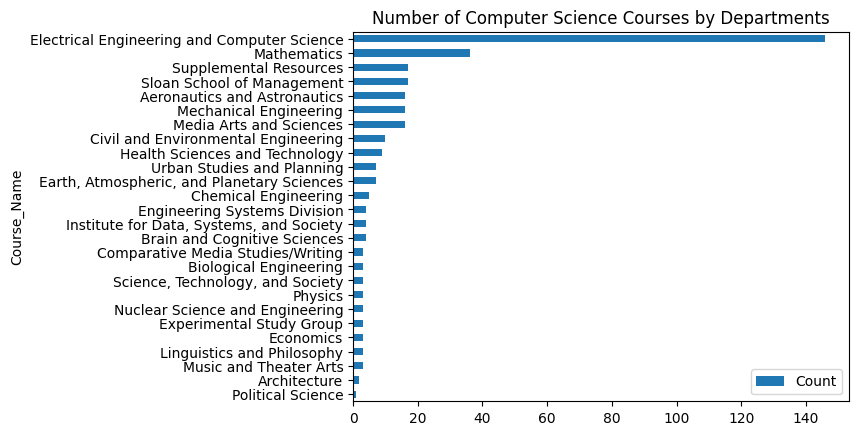

In [38]:
NumberCourses.sort_values('Count', ascending=True).plot(kind = "barh",
                                                        y='Count',
                                                        x='Course_Name')
plt.title('Number of Computer Science Courses by Departments')
plt.show()

## Resource File Type Count

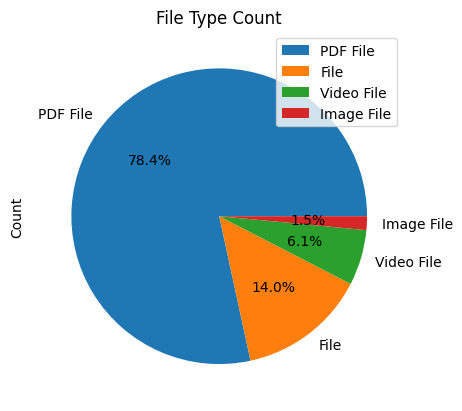

In [37]:
fTypeCount.plot(kind = "pie", y = 'Count', labels = fTypeCount['File_Type'], autopct='%1.1f%%')
plt.title('File Type Count')
plt.show()

## Course Level Count

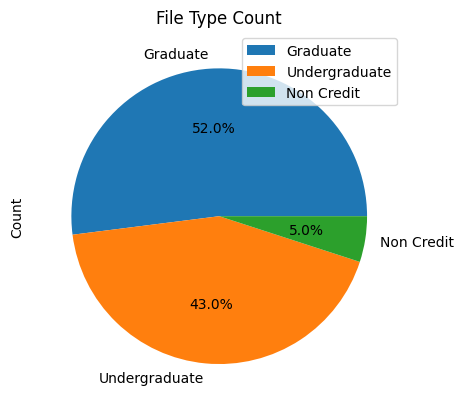

In [43]:
levelCount.plot(kind = "pie", y = 'Count', labels = levelCount['level'], autopct='%1.1f%%')
plt.title('File Type Count')
plt.show()